# Project: Wrangling and Analyze Data

## About project 
The dataset that will wrangled (and analyzed and visualized) is the tweet archive of Twitter user **@dog_rates**, also known as **WeRateDogs**. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

### The Data
#### A. Enhanced Twitter Archive
The WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets, but not everything. One column the archive does contain though: each tweet's text, which was used to extract rating, dog name, and dog "stage" (i.e. doggo, floofer, pupper, and puppo) to make this Twitter archive "enhanced." Of the 5000+ tweets have been filtered for tweets with ratings only (there are 2356).
#### B. Tweet Image Prediction File
Every image in the WeRateDogs Twitter archive through a neural network that can classify breeds of dogs*. The results: a table full of image predictions (the top three only) alongside each tweet ID, image URL, and the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images).
#### C. Additional Data via Twitter API
Because we have the tweet IDs of **WeRateDogs** Twitter archive we will be able to gather **retweet count, favorite count** and any additional data. The Twitter API requires users to be authorized to use it. THis meas that before we can run the API querying code, we will need to set up a personal Twitter developer account. 

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
# Downloading the file manually and reading it
import pandas as pd
import numpy as np
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [2]:
# Downloaded programmatically using the Requests library
import requests
url =  'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open ('image-predictions.tsv', mode = 'wb') as file :
    file.write(response.content)


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [3]:
# Query Twitter API for tweet in the Twitter archive 
import tweepy
# These keys are hidded to comply with Twitter's API terms and conditions
consumer_key = 'YOUR CONSUMER KEY'
consumer_secret = 'YOUR CONSUMER SECRET'
access_token = 'YOUR ACCESS TOKEN'
access_secret = 'YOUR ACCESS SECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [4]:
# converting the txt file to a data list where each line contains one place of tweet info 
import json
df_list = []
with open('tweet-json.txt') as file:
    for line in file:
        df_list.append(json.loads(line))

In [5]:
print(df_list[0])

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}, 'extended_entities': {'media

In [6]:
# Creating a dataframe from the previous list that contains the id, retweet count and favorite count
tweet_data = pd.DataFrame(df_list, columns = ['id', 'retweet_count', 'favorite_count'])

In [7]:
# Checking dataset
tweet_data.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [8]:
# Changing the name of the id column to tweet_id
tweet_data = tweet_data.rename(columns= {'id':'tweet_id'})
tweet_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [9]:
# Saving the dataframe to a csv file for future use 
tweet_data.to_csv('tweet_data.csv', index = False)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [10]:
# Assesintg the datasets 
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [11]:
twitter_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [12]:
twitter_archive.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1729,679862121895714818,NaN,NaN,2015-12-24 03:12:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Dammit hooman I'm jus trynna lik the fler"" 11...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/679862121...,11,10,None,None,None,None,None
1643,683857920510050305,NaN,NaN,2016-01-04 03:50:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sadie. She fell asleep on the beach and h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/683857920...,10,10,Sadie,None,None,None,None
2130,670093938074779648,NaN,NaN,2015-11-27 04:16:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Wally. He's a Flaccid Mitochondria. Go...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670093938...,9,10,Wally,None,None,None,None
126,868552278524837888,NaN,NaN,2017-05-27 19:39:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Cooper. His expression is the sam...,NaN,NaN,NaN,"https://www.gofundme.com/3ti3nps,https://twitt...",12,10,Cooper,None,None,None,None
2318,666454714377183233,NaN,NaN,2015-11-17 03:16:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I'll name the dogs from now on. This is Kreggo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666454714...,10,10,Kreggory,None,None,None,None
176,857746408056729600,NaN,NaN,2017-04-28 00:00:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Thor. He doesn't have finals because he's...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/857746408...,13,10,Thor,None,None,None,None
795,773308824254029826,NaN,NaN,2016-09-06 23:56:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bungalo. She uses that face to get wha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/773308824...,12,10,Bungalo,None,None,None,None
217,850380195714523136,NaN,NaN,2017-04-07 16:10:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Leo. He's a personal triathlon coach. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/850380195...,13,10,Leo,None,None,None,None
2237,668142349051129856,NaN,NaN,2015-11-21 19:02:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This lil pup is Oliver. Hops around. Has wings...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668142349...,2,10,None,None,None,None,None
672,789903600034189313,NaN,NaN,2016-10-22 18:57:48 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Ralphy. His dreams were just shattered...,NaN,NaN,NaN,https://vine.co/v/5wPT1aBxPQZ,13,10,Ralphy,None,None,pupper,None


In [13]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [14]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [15]:
twitter_archive.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [16]:
twitter_archive.rating_denominator.describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [17]:
twitter_archive[twitter_archive.rating_denominator ==0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [18]:
twitter_archive.loc[313, 'text']

"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"

In [19]:
twitter_archive[twitter_archive.rating_denominator >10].count()[0]

20

In [20]:
twitter_archive.name.value_counts()

None         745
a             55
Charlie       12
Cooper        11
Lucy          11
Oliver        11
Lola          10
Penny         10
Tucker        10
Bo             9
Winston        9
Sadie          8
the            8
an             7
Toby           7
Daisy          7
Buddy          7
Bailey         7
Jack           6
Scout          6
Bella          6
Rusty          6
Jax            6
Oscar          6
Leo            6
Dave           6
Stanley        6
Milo           6
Koda           6
Alfie          5
            ... 
Timmy          1
Combo          1
Rover          1
Tycho          1
Kingsley       1
Lucia          1
Andru          1
Wafer          1
Rupert         1
Beebop         1
Mac            1
DonDon         1
Fletcher       1
Mojo           1
Koko           1
Jed            1
Genevieve      1
Tove           1
Billl          1
Buddah         1
O              1
Tiger          1
Brady          1
Harry          1
Crawford       1
Banditt        1
Boston         1
Ron           

In [21]:
twitter_archive.retweeted_status_id.isnull().count()

2356

In [22]:
i_prediction = pd.read_csv('image-predictions.tsv', sep= '\t')
i_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [23]:
i_prediction.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1555,793195938047070209,https://pbs.twimg.com/media/CwH_foYWgAEvTyI.jpg,2,Labrador_retriever,0.654762,True,golden_retriever,0.074100,True,Chihuahua,0.042339,True
480,675354435921575936,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1096,720059472081784833,https://pbs.twimg.com/media/Cf4qRcmWEAA9V4h.jpg,1,Mexican_hairless,0.451852,True,redbone,0.254884,True,Italian_greyhound,0.094818,True
563,678021115718029313,https://pbs.twimg.com/media/CWjQm5gXAAA9GkD.jpg,1,miniature_pinscher,0.822048,True,Doberman,0.096085,True,Rottweiler,0.032709,True
939,703769065844768768,https://pbs.twimg.com/media/CcRKOzyXEAQO_HN.jpg,2,boxer,0.838994,True,Greater_Swiss_Mountain_dog,0.088800,True,bull_mastiff,0.031684,True
1575,796031486298386433,https://pbs.twimg.com/media/CwwSaWJWIAASuoY.jpg,1,golden_retriever,0.893775,True,Labrador_retriever,0.070140,True,doormat,0.008419,False
835,694183373896572928,https://pbs.twimg.com/media/CaI8Fn0WAAIrFJN.jpg,1,teddy,0.441499,False,Pekinese,0.080870,True,Shih-Tzu,0.072099,True
729,686606069955735556,https://pbs.twimg.com/media/CYdQktMWsAEI29_.jpg,1,Labrador_retriever,0.320012,True,Ibizan_hound,0.208172,True,Saluki,0.078975,True
1989,872967104147763200,https://pbs.twimg.com/media/DB1m871XUAAw5vZ.jpg,2,Labrador_retriever,0.476913,True,Chesapeake_Bay_retriever,0.174145,True,German_short-haired_pointer,0.092861,True
682,683834909291606017,https://pbs.twimg.com/ext_tw_video_thumb/68383...,1,Maltese_dog,0.738449,True,toy_poodle,0.102992,True,Samoyed,0.023247,True


In [24]:
i_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [25]:
i_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [26]:
tweet_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [27]:
tweet_data.sample(10)

,tweet_id,retweet_count,favorite_count
1424,697881462549430272,1337,3313
702,785927819176054784,3652,12696
79,877316821321428993,5414,27907
2003,672272411274932228,3677,6888
943,752660715232722944,1794,4878
1661,682808988178739200,210,1953
1884,674790488185167872,278,1180
778,775842724423557120,3116,13022
495,813157409116065792,2557,8588
157,861005113778896900,4119,17538


In [28]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [29]:
tweet_data.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


### Quality issues
1.D1 `twitter_archive` tweet_id column is integer datatype instead of string datatype

2.D1 `twitter_archive` timestamp column is string datatype instead of datetime datatype 

3.D1 `twitter_archive` the rating_denominator has some values higher than 10

4.D1 `twitter_archive` some dog names are incorrect e.g. a, an, the,  etc

5.D1 `twitter_arcive` there are 181 retweets and they are not needed, just tweets are needed

6.D2 `i_prediction` there is inconsistency of upper/lower case in the p1, p2, p3 columns

7.D2`i_prediction` underscores are used in names instead of spaces in the p1, p2, p3 columns

8.D2 `i_prediction` there are some missing photos for some tweet_ids (2075 rows instead of 2356)



### Tidiness issues
1.`twitter_archive` doggo, floofer, pupper, puppo have their own column each and they can all be in one column

2.All the 3 dataframes are related but they are seperated 

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [30]:
# Make copies of original pieces of data
clean_twitter_archive = twitter_archive.copy()
clean_i_prediction = i_prediction.copy()
clean_tweet_data = tweet_data.copy()

## Solving Quality issues 

### DF1.Q1: tweet_id column is integer datatype instead of string datatype

#### Define
Correct invalid datatype by converting tweet_id to string 

#### Code

In [31]:
# Changing tweet_id to string from integer
clean_twitter_archive.tweet_id = clean_twitter_archive.tweet_id.astype(str)

#### Test

In [32]:
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

### DF1.Q2: timestamp column is string datatype instead of datetime datatype

#### Define 
Correct invalid datatype by converting timestamp to datetime

#### Code 

In [33]:
# Changing timestamp to datetime dtype from string
clean_twitter_archive.timestamp = pd.to_datetime(clean_twitter_archive.timestamp)

#### Test

In [34]:
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](

### DF1.Q3: the rating_denominator has some values higher than 10

#### Define
Drop the rows that have values higher than 10

#### Code

In [35]:
# Dropping rows that have values greater than 10 as denominators
clean_twitter_archive.drop(clean_twitter_archive[(clean_twitter_archive['rating_denominator'] > 10)].index, inplace = True)

#### Test

In [36]:
clean_twitter_archive[clean_twitter_archive.rating_denominator >10].count()[0]

0

### DF1.Q4:  some dog names are incorrect e.g. a, an, the, etc

#### Define
Convert incorrect names to No name

#### Code

In [37]:
# Code for getting all the stopwords (they all start with small letters includinh None)
empty_set = set()
for x in clean_twitter_archive['name']:
    if x[0].islower():
        empty_set.add(x)
wrong_names = list((empty_set))+['None', 'actually']
clean_twitter_archive['name'].replace(wrong_names, 'No name', inplace = True)

#### Test

In [38]:
clean_twitter_archive['name'].value_counts()[:15]

No name    836
Charlie     12
Oliver      11
Cooper      11
Lucy        11
Penny       10
Tucker      10
Lola        10
Winston      9
Bo           9
Sadie        8
Bailey       7
Toby         7
Daisy        7
Buddy        7
Name: name, dtype: int64

### DF1.Q5: there are 181 retweets and they are not needed, just tweets are needed

#### Define
Delete rows that represents retweets and all related columns 

#### Code

In [39]:
# Keep only original tweets that have no retweet status id
clean_twitter_archive = clean_twitter_archive[clean_twitter_archive.retweeted_status_id.isnull()]
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2156 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2156 non-null object
in_reply_to_status_id         74 non-null float64
in_reply_to_user_id           74 non-null float64
timestamp                     2156 non-null datetime64[ns]
source                        2156 non-null object
text                          2156 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2101 non-null object
rating_numerator              2156 non-null int64
rating_denominator            2156 non-null int64
name                          2156 non-null object
doggo                         2156 non-null object
floofer                       2156 non-null object
pupper                        2156 non-null object
puppo                         2156 non-null object
dtypes: datetime64[ns](1), fl

In [40]:
# Delete related cloumns
clean_twitter_archive = clean_twitter_archive.drop(columns= ['retweeted_status_id', 'retweeted_status_user_id', 
                                                             'retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id'])

#### Test

In [41]:
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2156 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2156 non-null object
timestamp             2156 non-null datetime64[ns]
source                2156 non-null object
text                  2156 non-null object
expanded_urls         2101 non-null object
rating_numerator      2156 non-null int64
rating_denominator    2156 non-null int64
name                  2156 non-null object
doggo                 2156 non-null object
floofer               2156 non-null object
pupper                2156 non-null object
puppo                 2156 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 219.0+ KB


### DF2.Q6: There is inconsistency of upper/lower case in the p1, p2, p3 columns

#### Define
Convert all Lowercase to Uppercase in Column p1, p2, p3

#### Code

In [42]:
# Converting all the lowercases to uppercases
clean_i_prediction.p1 = clean_i_prediction.p1.str.title()
clean_i_prediction.p2 = clean_i_prediction.p2.str.title()
clean_i_prediction.p3 = clean_i_prediction.p3.str.title()

#### Test

In [43]:
clean_i_prediction.p1.sample(10)

1406    Boston_Bull
122            Chow
409            Suit
607         Samoyed
1109        Samoyed
1105     Great_Dane
15            Lhasa
561       Dalmatian
364          Tusker
1339       Pembroke
Name: p1, dtype: object

In [44]:
clean_i_prediction.p2.sample(10)

766       Golden_Retriever
1320        French_Bulldog
1303              Cardigan
1493              Airedale
476                Mailbox
114                    Hog
76      Miniature_Pinscher
1877    Labrador_Retriever
613             Toy_Poodle
1260     Great_White_Shark
Name: p2, dtype: object

In [45]:
clean_i_prediction.p3.sample(10)

178                          Saluki
1161             Labrador_Retriever
737                          Saluki
700     West_Highland_White_Terrier
309                          Beacon
1686                 Cocker_Spaniel
1213               Golden_Retriever
1403                 Cocker_Spaniel
686        Chesapeake_Bay_Retriever
7                          Fur_Coat
Name: p3, dtype: object

### DF2.Q7: Underscores are used in names instead of spaces in the p1, p2, p3 columns

#### Define
Convert underscores used in names to spaces in column p1, p2, p3

#### Code

In [46]:
# Converting names with underscores to spaces 
clean_i_prediction.p1 = clean_i_prediction.p1.str.replace('_', ' ')
clean_i_prediction.p2 = clean_i_prediction.p2.str.replace('_', ' ')
clean_i_prediction.p3 = clean_i_prediction.p3.str.replace('_', ' ')

#### Test

In [47]:
clean_i_prediction.p1.sample(10)

1166                   Pug
1359      Blenheim Spaniel
1097                   Alp
251        Norwich Terrier
1871    Labrador Retriever
918              Chihuahua
569     Miniature Pinscher
517            Maltese Dog
417             Pomeranian
1518             Chihuahua
Name: p1, dtype: object

In [48]:
clean_i_prediction.p2.sample(10)

1774               Window Screen
1832                      Jaguar
1051                  Eskimo Dog
239                      Basenji
681               Siberian Husky
1247                  Weimaraner
2028                   Chihuahua
1999    Chesapeake Bay Retriever
189              Norfolk Terrier
1248                   Chihuahua
Name: p2, dtype: object

In [49]:
clean_i_prediction.p3.sample(10)

1878      Labrador Retriever
1162    Old English Sheepdog
1934                  Kuvasz
1933      Labrador Retriever
1916      Labrador Retriever
1255                  Saluki
885         Golden Retriever
1699                    Chow
231               Toy Poodle
773                Chihuahua
Name: p3, dtype: object

### DF2.Q8: There are some missing photos for some tweet_ids (2075 rows instead of 2356)

#### Define
Drop rows without photos 

#### Code

In [50]:
# Deleting rows without photos 
clean_i_prediction = clean_i_prediction[clean_i_prediction.jpg_url.notnull()]

#### Test 

In [51]:
clean_i_prediction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 168.2+ KB


## Tidiness Issues

### T1: doggo, floofer, pupper, puppo have their own column each and they can all be in one column

#### Define
Melt doggo, fluffer, pupper, poppo into one column called dog_stages

#### Code 

In [52]:
# Extract dog stage from text column into the new dog_stage column 
clean_twitter_archive['dog_stage'] = clean_twitter_archive['text'].str.extract('(doggo|floofer|pupper|puppo)')
clean_twitter_archive.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,NaN
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,NaN
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,NaN
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,NaN
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,NaN


In [53]:
# Drop unused columns
clean_twitter_archive = clean_twitter_archive.drop(columns=['doggo', 'floofer','pupper','puppo'])

#### Test

In [54]:
clean_twitter_archive.dog_stage.value_counts()

pupper     238
doggo       83
puppo       32
floofer      4
Name: dog_stage, dtype: int64

In [55]:
clean_twitter_archive.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
938,753294487569522689,2016-07-13 18:26:16,"<a href=""http://twitter.com/download/iphone"" r...",This is Ace. He's a window washer. One of the ...,https://twitter.com/dog_rates/status/753294487...,11,10,Ace,NaN
1197,717009362452090881,2016-04-04 15:22:08,"<a href=""http://twitter.com/download/iphone"" r...",This is Smokey. He's having some sort of exist...,https://twitter.com/dog_rates/status/717009362...,10,10,Smokey,pupper
1014,747204161125646336,2016-06-26 23:05:29,"<a href=""http://twitter.com/download/iphone"" r...",This is Clark. He's deadly af. Clearly part sh...,https://twitter.com/dog_rates/status/747204161...,10,10,Clark,NaN
271,841077006473256960,2017-03-13 00:02:39,"<a href=""http://twitter.com/download/iphone"" r...",This is Dawn. She's just checking pup on you. ...,https://twitter.com/dog_rates/status/841077006...,12,10,Dawn,NaN
1554,688898160958271489,2016-01-18 01:38:15,"<a href=""http://twitter.com/download/iphone"" r...",When you have a ton of work to do but then rem...,https://twitter.com/dog_rates/status/688898160...,10,10,No name,NaN
1528,690348396616552449,2016-01-22 01:40:58,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Oddie. He's trying to communicate. 12/...,https://vine.co/v/iejBWerY9X2,12,10,Oddie,NaN
891,759557299618865152,2016-07-31 01:12:26,"<a href=""http://twitter.com/download/iphone"" r...",This is Emma. She can't believe her last guess...,https://twitter.com/dog_rates/status/759557299...,10,10,Emma,NaN
540,806542213899489280,2016-12-07 16:53:43,"<a href=""http://twitter.com/download/iphone"" r...",This is Waffles. He's concerned that the dandr...,https://twitter.com/dog_rates/status/806542213...,11,10,Waffles,NaN
1376,701805642395348998,2016-02-22 16:27:58,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Please pray for this pupper. Nothing wrong wit...,https://vine.co/v/ivV6Y37mH5Z,11,10,No name,pupper
1733,679777920601223168,2015-12-23 21:37:40,"<a href=""http://twitter.com/download/iphone"" r...",This is Rinna. She's melting. 10/10 get inside...,https://twitter.com/dog_rates/status/679777920...,10,10,Rinna,pupper


### T2: All the 3 dataframes are related but they are seperated

### Define: 
Merge all dataframe in to one dataframe based on the tweet_id

#### Code

In [56]:
# Converting the datatype of these datasets to strings to be able to merge them with clean_twittwr_archive
clean_i_prediction.tweet_id = clean_i_prediction.tweet_id.astype(str)
clean_tweet_data.tweet_id = clean_tweet_data.tweet_id.astype(str)
# Merging the cleaned Enhanced Twitter Archive Data with the tweet Data from Twitter API
clean_twitter_archive = pd.merge(clean_twitter_archive, clean_tweet_data, on = 'tweet_id', how = 'left')
# Merging the resulting merged archive with the Tweet Image Predictions data
clean_twitter_archive = pd.merge(clean_twitter_archive, clean_i_prediction, on = 'tweet_id', how = 'left')

#### Test

In [57]:
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2156 entries, 0 to 2155
Data columns (total 22 columns):
tweet_id              2156 non-null object
timestamp             2156 non-null datetime64[ns]
source                2156 non-null object
text                  2156 non-null object
expanded_urls         2101 non-null object
rating_numerator      2156 non-null int64
rating_denominator    2156 non-null int64
name                  2156 non-null object
dog_stage             357 non-null object
retweet_count         2156 non-null int64
favorite_count        2156 non-null int64
jpg_url               1978 non-null object
img_num               1978 non-null float64
p1                    1978 non-null object
p1_conf               1978 non-null float64
p1_dog                1978 non-null object
p2                    1978 non-null object
p2_conf               1978 non-null float64
p2_dog                1978 non-null object
p3                    1978 non-null object
p3_conf               1978 

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [58]:
clean_twitter_archive.to_csv('twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

#### A. The Percentage of different dog stages

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [60]:
dogstage_df = clean_twitter_archive.dog_stage.value_counts()
dogstage_df

pupper     238
doggo       83
puppo       32
floofer      4
Name: dog_stage, dtype: int64

(-1.1674907312967466,
 1.4173048767682996,
 -1.340549610877557,
 1.2021812195864017)

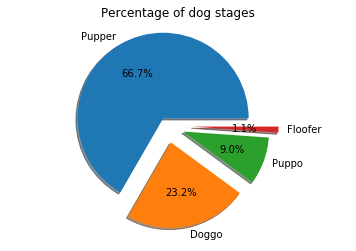

In [64]:
# Creating a pie chart
plt.pie(dogstage_df,
       labels = ['Pupper', 'Doggo', 'Puppo', 'Floofer'],
       autopct = '%1.1f%%', # To show percentage on plot 1.1 formats the percentage of the tenth place
       shadow = True,
       explode = (0.1, 0.2, 0.2, 0.3)
       )
plt.title('Percentage of dog stages')
plt.axis ('equal') # By default,matplotlip creates pie charts with a tilt. this line removes the tilt

### Insights:
1. Pupper has the highest percentage

2. Floofer has the lowest percentage

3.

Text(0,0.5,'Favourite Count')

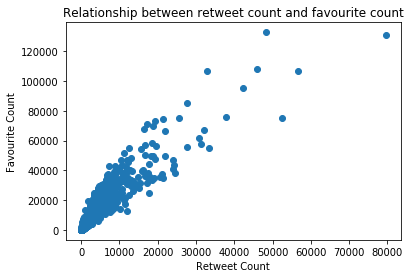

In [62]:
# Creating a scattered plot 
plt.scatter(clean_twitter_archive.retweet_count, clean_twitter_archive.favorite_count)
plt.title('Relationship between retweet count and favourite count')
plt.xlabel('Retweet Count')
plt.ylabel('Favourite Count')

### Insights 
it appears that there is a positive correlation between retweet count and favourite count 